# Practical Introduction to Support Vector Machine

- Hard-margin SVM
  - Two-class linear classification
  - Calculation of margin
  - Langulange multiplier
  - KKT condition
  - Support vectors
  - SMO algorithm
- Soft-margin SVM
  - Slack variable
  - Penalty C
- Nonlinear SVM
  - Kernel function
  - Kernel trick
- Appendix
  - Example of Langulange multipler
  - Quadratic programming

Most of mathmatical fomulation decribed below comes from the reference [Bishop]. But I start with a simple linear kernel version with some extra notes to make them easy to understand.
## Hard-margin SVM

### Two-class linear classification

We will derive the concept of support vector machine from the two-class classification using a linear model $y$ of the form 

\begin{equation}
y(\bf{x}) = \bf{w}^T \bf{x} + b
\end{equation}

 where $\bf{w}$ is a weight vector and $b$ is a bias parameter.

The training data set comprises $N$ input vectors $\mathbf{x}_1, ...,  \mathbf{x}_N$ with
corresponding target values $t_1,...,t_N$ where $t_n ∈ \{−1, 1\}$, and new data points $\mathbf{x}$ are classified according to the sign of $y(\mathbf{x})$.


We shall assume for the moment that **the training data set is linearly separable in
feature space**, so that by definition there exists at least one choice of the parameters
$\mathbf{w}$ and $b$ such that a function of the form (7.1) satisfies $y(\mathbf{x}_n) > 0$ for points having
$t_n = +1$ and $y(\mathbf{x}_n) < 0$ for points having $t_n = −1$, so that $t_n y(\mathbf{x}_n) > 0$ for all training data points.

### Calculation of margin
In support vector machines the decision boundary is chosen to be the one for which the margin is maximized. For this purpose, we need to calculate the distance of a point $\bf{x}_m$ to the decision surface (hyperplane)

Consider two points $\mathbf{x}_A$ and $\mathbf{x}_B$ both of which lie on the decision surface.
Because $y(\mathbf{x}_A) = y(\mathbf{x}_B) = 0$, we have $\mathbf{w}^T (\mathbf{x}_A − \mathbf{x}_B)=0$ and hence the vector $\mathbf{w}$ is
orthogonal to every vector lying within the decision surface, and so $\mathbf{w}$ determines the orientation of the decision surface. Then the point $\mathbf{x}'$ on the hyperplane that is the closest point to the origin can be represented as $\mathbf{x}' = a\mathbf{w}$ where $a$ is a scalar value. Since $\mathbf{x}'$ is on the hyperplane, we know that $\mathbf{w}^T \mathbf{x}' + b = 0\Rightarrow a \mathbf{w}^T \mathbf{w} + b = 0 \Rightarrow a = -\frac{b}{||w||^2}$. Therefore, $||\mathbf{x}'|| = ||aw|| = -\frac{b}{||w||}$. Now rewrite $\mathbf{x}'$ to $\mathbf{x}$ which satisfy $y(\mathbf{x}) = 0$, and the distance of a point $\mathbf{x}$ from a hyperplane is given by $|y(\mathbf{x})|/||w||$. Furthermore, we are only interested in solutions for which all data points are correctly classified, so that $t_n y(\mathbf{x}_n) > 0$ for all $n$. Thus the distance of a point $\mathbf{x}_n$ to the decision surface is given by 
\begin{equation}
\frac{t_n y(\mathbf{x}_n)}{||\mathbf{w}||} = \frac{t_n(\mathbf{w}^T \mathbf{x}_n + b)}{||\mathbf{w}||}
\end{equation}

<img width=400 src="https://i.stack.imgur.com/tnAsd.png">

The margin is given by the perpendicular distance to the closest point $\mathbf{x}_n$ from the
data set, and we wish to optimize the parameters $\mathbf{w}$ and $b$ in order to maximize this
distance. Thus the maximum margin solution is found by solving
\begin{equation}
\underset{\mathbf{w}, b}{\mathrm{argmax}} \{ \frac{1}{||\mathbf{w}||}
\underset{n}{\mathrm{argmin}} [ t_n(\mathbf{w}^T \mathbf{x}_n + b) ] \}
\end{equation}
We note that the margin $|y(\mathbf{x})|/||w||$ is invariant to the rescaling $\mathbf{w} \rightarrow k\mathbf{w}$ and $b \rightarrow kb$, and we use this freedom to set 
\begin{equation}
t_n(\mathbf{w}^T \mathbf{x}_n + b) = 1
\end{equation}

for the point that is closest to the surface. In this case, all data points ($n = 1, ..., N$) will satisfy the constraints

\begin{equation}
t_n(\mathbf{w}^T \mathbf{x}_n + b) \ge 1
\end{equation}

The optimization problem then simply requires that we maximize $\frac{1}{||\mathbf{w}||}$, which is
equivalent to minimizing $||\mathbf{w}||^2$, and so we have to solve the optimization problem

\begin{equation}
\underset{\mathbf{w}, b}{\mathrm{argmin}}
\frac{1}{2}||\mathbf{w}||^2
\end{equation}

subject to the constraints.

### Langulange multiplier
In order to solve this constrained optimization problem, we introduce Lagrange multipliers $a_n \ge 0$, with one multiplier an for each of the constraints, giving
the Lagrangian function

\begin{equation}
L(\mathbf{w}, b, \mathbf{a}) = \frac{1}{2}||\mathbf{w}||^2 − 
\overset{N}{\underset{n=1}{\sum}} a_n {t_n(\mathbf{w}^T \mathbf{x}_n + b) − 1}
\end{equation}

Setting the derivatives of $L$ with respect to $\bf{w}$ and $b$ equal to zero, we obtain the following two conditions

\begin{equation}
\mathbf{w} = \overset{N}{\underset{n=1}{\sum}} a_n t_n \mathbf{x}_n
\end{equation}

\begin{equation}
\overset{N}{\underset{n=1}{\sum}} a_n t_n = 0
\end{equation}


Eliminating $\bf{w}$ and $b$ from $L(\mathbf{w}, b, \mathbf{a})$ using these conditions then gives the **dual representation** of the maximum margin problem in which we want to maximize

\begin{equation}
\overset{N}{\underset{n=1}{\sum}} a_n - 
\frac{1}{2}\overset{N}{\underset{n=1}{\sum}}\overset{N}{\underset{m=1}{\sum}}
a_n a_m t_n t_m \mathbf{x}_n \mathbf{x}_m
\end{equation}

### KKT condition

Because the above Lagrange multiplier was an optimazation of a function with inequality constraints, it has to satisfy the following condition, known as KTT condition (Karush–Kuhn–Tucker conditions).

\begin{equation}
a_n \ge 0 \\
t_n y(x_n) − 1 \ge 0 \\
a_n \{t_n y(x_n) − 1\} = 0 \\
\end{equation}

Here the idea of support vector comes in. For every data point, either $a_n = 0$ or $t_n y(x_n) = 1$. Any data point for
which $a_n = 0$ will not appear in the sum in (7.13) and hence plays no role in making predictions for new data points. The remaining data points are called **support vectors**,
and because they satisfy $t_n y(x_n) = 1$, they correspond to points that lie on the maximum margin hyperplanes in feature space.

## Soft-margin SVM

### Slack variable

### Penalty C

## Nonlinear SVM

### Kernel function
So far what we saw is a linear kernel.
\begin{equation}
\overset{N}{\underset{n=1}{\sum}} a_n - 
\frac{1}{2}\overset{N}{\underset{n=1}{\sum}}\overset{N}{\underset{m=1}{\sum}}
a_n a_m t_n t_m \mathbf{x}_n \mathbf{x}_m
\end{equation}

### Kernel trick
With kernel functions, you can operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. This operation is often computationally cheaper than the explicit computation of the coordinates. This approach is called the **kernel trick** and a class of algorithms which employs the technique is called kernel methods.

- Without kernel trick

## Appendix

### Example of Lagrange multiplier
For problems where you want to find the maximum value of $f(x, y)$, subject to $g(x, y)$, you can use the following approach,
> Given $L(x, y, \lambda) = f(x, y) - \lambda g(x, y)$, if $(\alpha, \beta)$ gives an extreme value, it is a solution of $\frac{\delta L}{\delta x} = \frac{\delta L}{\delta y} = \frac{\delta L}{\delta \lambda} = 0$ or $\frac{\delta g}{\delta x} = \frac{\delta g}{\delta y} = 0$

This is called Lagrange multiplier and $L$ is called Lagrange function. A simple example follows:

> Find the maximum value of the objective function $f(x, y) = 2x + 3y$, subject to the constraint $x^2 + y^2 = 1$

In this case, we have a constraint $g(x, y) = x^2 + y^2 - 1 = 0$.
First, we make L with three variables.
$L(x,y,\lambda)=2x+3y−\lambda(x^2+y^2−1)$

Setting the derivatives of $L(x, y, \lambda)$ with respect to each variable to zero
zero, 
\begin{equation}
\frac{\delta L}{\delta x} = 2 - 2x\lambda = 0\\
\frac{\delta L}{\delta y} = 3 - 2y\lambda = 0\\
\frac{\delta L}{\delta \lambda} = -x^2 - y^2 + 1 = 0
\end{equation}

we obtain $x = 23y$ by removing $\lambda$ from the equations.
Use this in the third equation, then the candidate positions of extreme values are
$(x,y)=(\pm \frac{2}{\sqrt{13}}, \pm\frac{3}{\sqrt{13}})$ (See the code below)

Great news is that you can apply Lagrange multiplier to any other multivariable functions than two ($x, y$). Also, multiple constraints can be dealt in the same way. If you have $g(x) = 0$, $h(x) = 0$, we obtain the Lagrange function $L = f - \lambda g - \mu h$. This is what we see in the SVM part.

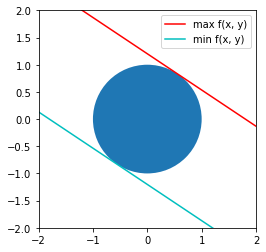

In [27]:
import numpy as np
import matplotlib.pyplot as plt

kp = 2*2/13**0.5 + 3*3/13**0.5
km = -2*2/13**0.5 - 3*3/13**0.5
y = lambda x, k: -(2/3)*x + k/3
xs = np.linspace(-2, 2, 50)
circle = plt.Circle((0, 0), 1)
fig, ax = plt.subplots()
ax.add_artist(circle)
ax.plot(xs, [y(x, kp) for x in xs], c="r", label="max f(x, y)")
ax.plot(xs, [y(x, km) for x in xs], c="c", label="min f(x, y)")
ax.set_aspect("equal")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.legend()

### Quadratic programming
Quadratic programming optimizes (minimizing or maximizing) a quadratic function of several variables subject to linear constraints on these variables. Intuitively, in case of N = 2, this is similar to find an optimal countor group of an ellipse/circle or other quadratic shape with several linear constraints. <img width=300 src="https://www.researchgate.net/profile/Christian_Bauckhage/publication/335099466/figure/fig1/AS:790344266444801@1565444165906/Contour-plot-of-the-objective-function-f-x-in-2-and-visualizations-of-the-two.png">

## Further reading
- Decision tree: SVMs learn a decision boundary that maximizes the distance between samples of the two classes, given a kernel. Decision trees learn the decision boundary by recursively partitioning the space in a manner that maximizes the information gain (or another criterion).

## Referece
- Christopher M. Bishop."Pattern Recognition and Machine Learning." Springer, 2006. [PDF](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)

- [SVM in SVG](https://shogo82148.github.io/homepage/memo/algorithm/svm/kernel-svm.svg)